## Kaggle: Customer Churn Prediction

#### Predict the churn status of a bank's customers
https://www.kaggle.com/shrutimechlearn/churn-modelling?select=Churn_Modelling.csv

In [40]:
churn_df = pd.read_csv('churn.csv')

churn_df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## 1 Data Pre-Processing

Steps taken:
1. Dropped columns that have high cardinality, unique, or unless to our model training (['RowNumber', 'CustomerId', ‘Surname’])
2. Separated the train, validation, and test. Here, we first split 30% of the dataset into the test dataset, and then split 50% of the test dataset to be the validation dataset.
3. Took a look at the data with pandas profiling as well as .describe(). 
4. According to the result, I then separated the columns into churn_numeric_columns, churn_ordinal_columns columns, and churn_binary_and_nominal columns. 
5. Created dummy variables for churn_binary_and_nominal.
6. Applied z-score normalization for churn_numeric_columns
7. Removed minimum value for churn_ordinal_columns so that they all started from 0.

In [41]:
# What is the average credit score of a customer that has closed their account?

churn_df[churn_df.Exited == 1]["CreditScore"].mean()

645.3514972999509

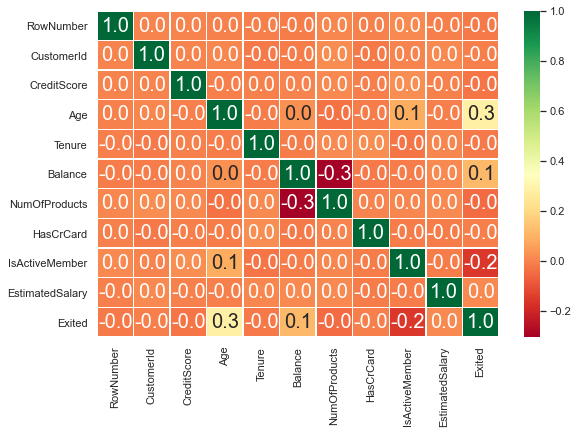

In [43]:
# Correlation matrix

f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(churn_df.corr(), annot = True, linewidths=.5, cmap ='RdYlGn', fmt='.1f',ax = ax,annot_kws={"fontsize":20})
pass

- From the heat map above, we can see that Age is most strongly correlated with Exited. This is interesting because my previous intuition was that people who are older tend to be more committed because they have more money to put in the bank account.
- Number of Products is strongly correlated with Balance, which was expected.

In [44]:
# Drop IDs
# Separate features (X) and label (y)

churn_df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
c_X, c_y = churn_df.drop(['Exited'], axis=1), churn_df[['Exited']]
c_X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [45]:
# Split train, test

c_X_train, c_X_test, c_y_train, c_y_test = train_test_split(
     c_X, c_y, test_size=0.2, random_state=42)

In [46]:
pd.concat([c_X_train,c_y_train], axis = 1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9254,686,France,Male,32,6,0.00,2,1,1,179093.26,0
1561,632,Germany,Male,42,4,119624.60,2,1,1,195978.86,0
1670,559,Spain,Male,24,3,114739.92,1,1,0,85891.02,1
6087,561,France,Female,27,9,135637.00,1,1,0,153080.40,1
6669,517,France,Male,56,9,142147.32,1,0,0,39488.04,1
...,...,...,...,...,...,...,...,...,...,...,...
5734,768,France,Male,54,8,69712.74,1,1,1,69381.05,0
5191,682,France,Female,58,1,0.00,1,1,1,706.50,0
5390,735,France,Female,38,1,0.00,3,0,0,92220.12,1
860,667,France,Male,43,8,190227.46,1,1,0,97508.04,1


In [47]:
# Pre-process training data

from pandas_profiling import ProfileReport
prof = ProfileReport(pd.concat([c_X_train,c_y_train], axis = 1))

prof.to_notebook_iframe()

In [48]:
# Since there are not a lot of features/columns, I just write them in the list 

churn_numeric_columns = ['Age', 'CreditScore','Balance','EstimatedSalary']
churn_ordinal_columns = ['Tenure','NumOfProducts']
churn_binary_and_nominal = ['Gender','HasCrCard','IsActiveMember','Geography']


print("Numeric:", churn_numeric_columns)
print("Ordinal:", churn_ordinal_columns)
print('Binary and nominal columns:', churn_binary_and_nominal)

Numeric: ['Age', 'CreditScore', 'Balance', 'EstimatedSalary']
Ordinal: ['Tenure', 'NumOfProducts']
Binary and nominal columns: ['Gender', 'HasCrCard', 'IsActiveMember', 'Geography']


In [49]:
churn_train_continuous_mean = c_X_train[churn_numeric_columns].mean()
churn_train_continuous_std_dev = c_X_train[churn_numeric_columns].std()
churn_train_ordinal_values_mins = c_X_train[churn_ordinal_columns].min()

# Use this function to preprocess the validation and test sets
    
def preprocess_classif_data(X, y):
    
    # One-Hot: For val and test, we do an additional step for the one-hot. 
    # There is a chance a value that appears on the training set won't appear on the test set, and vice-versa.
    # We compute the dummies, be then we align the dummies to the train_dummies, dropping additional columns
    # and adding new columns that were not present on X
    temporary_one_hot = pd.get_dummies(X[churn_binary_and_nominal])
    
    # We align the columns by adding any missing column to X.
    # detail reference document: https://stackoverflow.com/questions/51645195/pandas-align-function-illustrative-example    _, one_hot_values = train_one_hot_features.align(temporary_one_hot, 'left', axis=1)
    one_hot_values.fillna(0, inplace=True)
    
    # The z-score is using the mean and standard deviation values of train set
    z_scored_continuous_variables = (X[churn_numeric_columns] - churn_train_continuous_mean) / churn_train_continuous_std_dev

    # For the ordinal ones, we remove the minimum value so they all start from 0; we also save the minimum
    preprocessed_ordinal_values = X[churn_ordinal_columns] - churn_train_ordinal_values_mins    
    
    final_X = pd.concat([preprocessed_ordinal_values, 
                           z_scored_continuous_variables, 
                           one_hot_values], axis = 1)
    
    final_y = y['Exited']
    
    return final_X, final_y

final_c_X_train, final_c_y_train = preprocess_classif_data(c_X_train, c_y_train)
final_c_X_test, final_c_y_test = preprocess_classif_data(c_X_test, c_y_test)

## 2 Model Building

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn import metrics
import scikitplot as skplt


def report_classification_metrics(model, X_train, y_train, X_test, y_test, plot=True, feature = True):    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(classification_report(y_test, y_pred))

    # Confustion matrix
    print("The Confusion Matrix is \n \n", confusion_matrix(y_test, y_pred))
    
    
    if plot:
        # Confusion Matrix 
        plot_confusion_matrix(model, X_test, y_test)
        plt.show()
        
        # ROC Curve
        y_pred_proba = model.predict_proba(X_test)[::, 1]
        fpr, tpr, _  = metrics.roc_curve(y_test,  y_pred_proba)
        auc = metrics.roc_auc_score(y_test, y_pred_proba)
        plt.plot(fpr, tpr, label = "data 1, auc="+str(auc), color = 'maroon')
        plt.legend(loc = 4)
        plt.title('ROC curve')
        plt.show()
        
        # Gains Chart
        skplt.metrics.plot_cumulative_gain(y_test,model.predict_proba(X_test))
        plt.show()
    
    if feature:
        feature_imp = model.coef_
        coef_table = pd.DataFrame({"feature_names":X_train.columns, "Beta":feature_imp[0], "AbsBeta":abs(feature_imp[0])})
        # Get the sorted values
        coef_table = coef_table.sort_values(by = 'AbsBeta', ascending = False)
        print("The most important features in the model are: \n")
        print(coef_table)
    

#### Gains Chart

- Gains Chart is a common technique used in direct marketing where we select a small set of people to get a large number of responders.
- Baseline: Expected positives without the model in place 
- Model: Once we have the model in place and group the observations into bins as per their predicted probabilities we can get a lift/gain in prediction correctness.

Logit metrics:
              precision    recall  f1-score   support

           0       0.81      0.97      0.88      1607
           1       0.32      0.07      0.11       393

    accuracy                           0.79      2000
   macro avg       0.56      0.52      0.50      2000
weighted avg       0.71      0.79      0.73      2000

The Confusion Matrix is 
 
 [[1552   55]
 [ 367   26]]


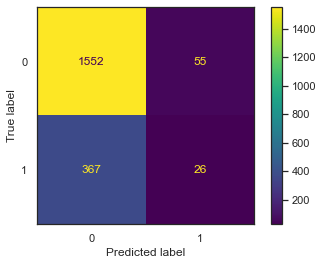

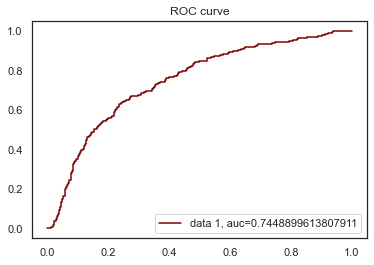

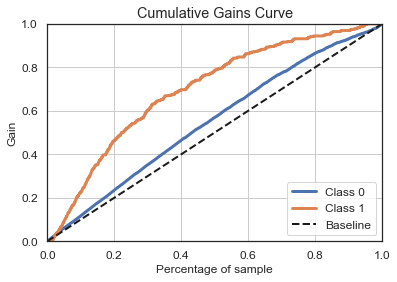

The most important features in the model are: 

        feature_names      Beta   AbsBeta
2                 Age  0.657257  0.657257
4             Balance  0.305260  0.305260
3         CreditScore -0.077770  0.077770
1       NumOfProducts -0.047444  0.047444
5     EstimatedSalary  0.030003  0.030003
0              Tenure -0.010285  0.010285
25         famsup_yes  0.000000  0.000000
21  reason_reputation  0.000000  0.000000
22    guardian_mother  0.000000  0.000000
23     guardian_other  0.000000  0.000000
24      schoolsup_yes  0.000000  0.000000
27     activities_yes  0.000000  0.000000
26           paid_yes  0.000000  0.000000
19        reason_home  0.000000  0.000000
28        nursery_yes  0.000000  0.000000
29         higher_yes  0.000000  0.000000
30       internet_yes  0.000000  0.000000
20       reason_other  0.000000  0.000000
16         Fjob_other  0.000000  0.000000
18       Fjob_teacher  0.000000  0.000000
17      Fjob_services  0.000000  0.000000
15        Fjob_health  0.000

In [77]:
%%time

# Train the models and report results for Logistic Regression, with L2 regularization

clf_logit = LogisticRegression(penalty = 'l2')

print("Logit metrics:")
report_classification_metrics(clf_logit, final_c_X_train, final_c_y_train, final_c_X_test, final_c_y_test)

Logit metrics:
              precision    recall  f1-score   support

           0       0.81      0.97      0.88      1607
           1       0.32      0.07      0.11       393

    accuracy                           0.79      2000
   macro avg       0.56      0.52      0.50      2000
weighted avg       0.71      0.79      0.73      2000

The Confusion Matrix is 
 
 [[1552   55]
 [ 367   26]]


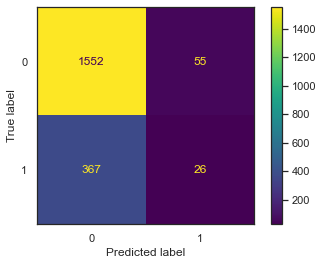

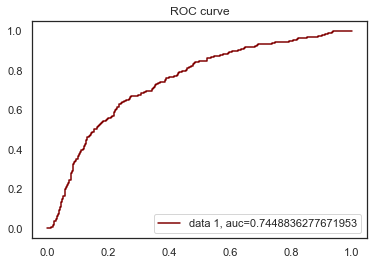

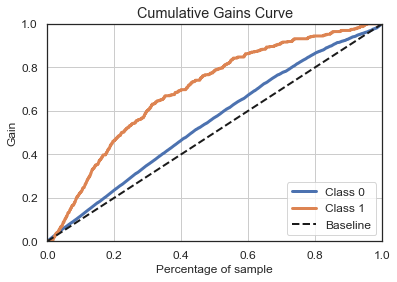

The most important features in the model are: 

        feature_names      Beta   AbsBeta
2                 Age  0.657782  0.657782
4             Balance  0.305572  0.305572
3         CreditScore -0.077846  0.077846
1       NumOfProducts -0.047424  0.047424
5     EstimatedSalary  0.030033  0.030033
0              Tenure -0.010287  0.010287
25         famsup_yes  0.000000  0.000000
21  reason_reputation  0.000000  0.000000
22    guardian_mother  0.000000  0.000000
23     guardian_other  0.000000  0.000000
24      schoolsup_yes  0.000000  0.000000
27     activities_yes  0.000000  0.000000
26           paid_yes  0.000000  0.000000
19        reason_home  0.000000  0.000000
28        nursery_yes  0.000000  0.000000
29         higher_yes  0.000000  0.000000
30       internet_yes  0.000000  0.000000
20       reason_other  0.000000  0.000000
16         Fjob_other  0.000000  0.000000
18       Fjob_teacher  0.000000  0.000000
17      Fjob_services  0.000000  0.000000
15        Fjob_health  0.000

In [78]:
%%time

# Train the models and report results for Logistic Regression, with no regularization

clf_logit = LogisticRegression(penalty='none')

print("Logit metrics:")
report_classification_metrics(clf_logit, final_c_X_train, final_c_y_train, final_c_X_test, final_c_y_test)

KNN metrics:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      1607
           1       0.55      0.34      0.42       393

    accuracy                           0.82      2000
   macro avg       0.70      0.64      0.66      2000
weighted avg       0.79      0.82      0.80      2000

The Confusion Matrix is 
 
 [[1499  108]
 [ 259  134]]


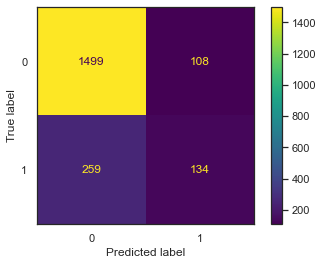

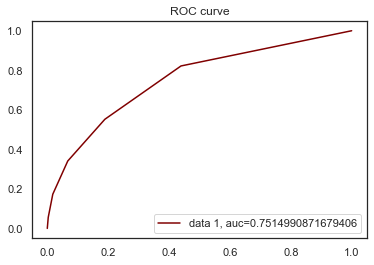

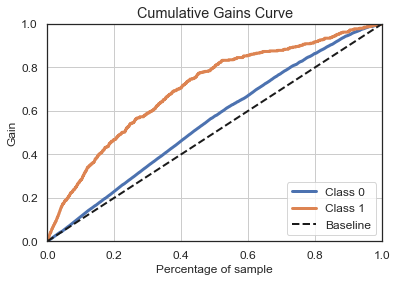

CPU times: user 860 ms, sys: 34.2 ms, total: 894 ms
Wall time: 877 ms


In [80]:
%%time

# Train the models and report results for KNN

clf_knn = KNeighborsClassifier()

print("KNN metrics:")
report_classification_metrics(clf_knn, final_c_X_train, final_c_y_train, final_c_X_test, final_c_y_test, feature = False)

## 3 Conclusion

### 3.1 KNN Classification performs better
- KNN classification model performs better. Because it has better precision, recall, and f1 scores.

### 3.2 Logistic Regression is faster
- KNN: 748 ms ± 22.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
- Logistic: 426 ms ± 15.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
- Logistic Regression is faster during training and reporting 

### 3.3 Regularization
- The default regularization for LogisticRegression is penalty=‘l2’. Since solver lbfgs supports only 'l2' or 'none' penalties, I compared the result with no regularization. Actually the results are the same

### 3.4 Most informative features
- According to the output of the Logistic Regression with L2 regularization, the top features (most informative), in a descending order, are: 
1. feature_names, Beta, AbsBeta
2. 2 Age, 0.657257, 0.657257
3. 4 Balance, 0.305260, 0.305260
4. 3 CreditScore, -0.077770, 0.077770
5. 1 NumOfProducts, -0.047444, 0.047444
6. 5 EstimatedSalary, 0.030003, 0.030003
7. 0 Tenure, -0.010285, 0.010285
- It surprises me that age has a significant positive coefficient. It didn’t occur to me that older people are more likely to close their bank account.

### 3.5 False negatives & false positives
- In the better performing KNN model, there are 259 False Negative and 108 False Positives. 

### 3.6 Metric: precision vs. recall
- I would consider recall as the more important metic. Recall means indicates what proportion of actual positives was identified correctly/selected. 
- Because my goal is to take action before customer exit, if a customer were to exit but it is not identified, it would be a bigger problem. 